# Large Random Samples

### Desigualdade de Markov

$$
P(X \geq t) \leq \frac{E[X^n]}{t^n}, ~dado~que~P(X \geq 0) = 1, t > 0
$$

### Desigualdade de Chebyshev 

Seja $X$ uma variável aleatória em que o segundo momento é finito. Então, $\forall t > 0$.

$$
P(|X - E[X]| \geq t) \leq \frac{Var[X]}{t^2} 
$$

### Propriedades Importantes

- $X_1, ..., X_n$ amostra aleatória (por definição mesma distribuição e independentes), com média $\mu$ e variância $\sigma^2$. Então $E[\bar{X_n}] = \mu$ e $Var[\bar{X_n}] = \sigma^2/n$.  

#### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Exemplo 6.2.2

Um engenheiro ambiental acredita que existam dois contaminantes na água: arsênico e chumbo. Suponha que ambas são variáveis aleatórias **independentes** $X$ e $Y$, medidas na mesma unidade. O engenheiro está interessado em saber a proporção de contaminação por chumbo em média, isto é, $E[R] = E[Y/(X + Y)]$.

Como nem sempre conhecemos a distribuição de R, podemos aproximar o valor esperado através de uma média amostral de $R$, através de observações $(X_1, Y_1), ..., (X_n, Y_n)$.

Usando a desigualdade de Chebyshev, (tente ver que $Var[R] \leq 1$).

$$
P(|\bar{R_n} - E[R]| \geq \epsilon) \leq \frac{1}{n\epsilon^2}
$$

In [2]:
# Usando apenas Chebyshev: 

epsilon = 0.0005
prob = 0.95  # probabilidade mínima de que a diferença entre a 
             # média amostral e o valor esperado seja menor do que epsilon

def get_number_simulations(epsilon, prob):
    
    assert prob >= 0 
    assert prob <= 1
    
    # Queremos que P <= 1 - prob-> 1/(n*eps**2) <= 1 - prob
    
    min_n = 1/((1 - prob)*(epsilon**2))
    min_n = np.ceil(min_n)
    
    print('----------------------------------------------------------------------')
    print('In order to have the sample mean at least {} close with probability {}: '.format(epsilon, prob))
    print('The minimum number of simulations are: {}'. format(int(min_n)))
    print('----------------------------------------------------------------------')
    return min_n

def get_epsilon(prob, n): 
    
    assert prob >= 0 
    assert prob <= 1
    
    # Queremos encontrar epsilon para que 1/(n*eps**2) = 1 - prob
    
    eps = np.sqrt(1/(n*(1 - prob)))
    return eps

_ = get_number_simulations(epsilon, prob)

----------------------------------------------------------------------
In order to have the sample mean at least 0.0005 close with probability 0.95: 
The minimum number of simulations are: 80000000
----------------------------------------------------------------------


In [3]:
# Testando com distribuição uniforme (X e Y tem distribuições uniformes)
# Nesse caso, podemos provar que E[R] = 0.5

probs = [0.6, 0.75, 0.9, 0.95, 0.99]

n_range = np.array([j*10**i for i in [2,3,4,5,6,7] for j in [1,2,3,4,5,6,7,8,9]])
E_R = []

for n in n_range:
    X = np.random.uniform(size = int(n))
    Y = np.random.uniform(size = int(n))
    R = Y/(X + Y)
    E_R.append(np.mean(R))

chebyshev_interval = np.empty(shape = (len(probs), len(n_range)))
for i, prob in enumerate(probs): 
    chebyshev_interval[i, :] = get_epsilon(prob, n_range)

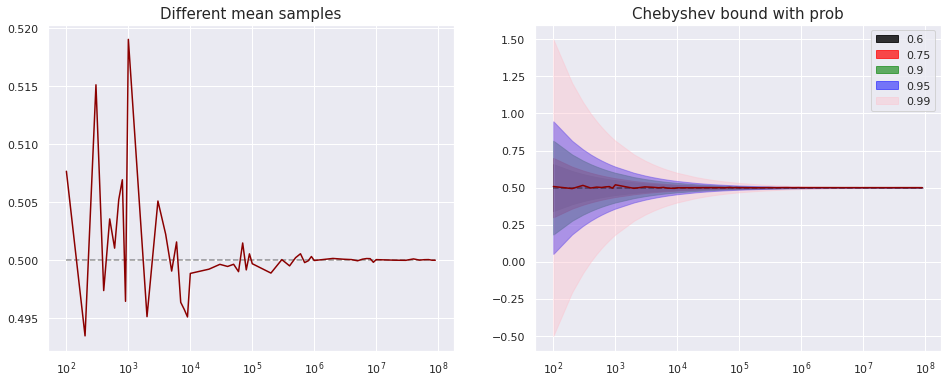

In [4]:
# Plotando
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

for i in [0,1]:
    ax[i].plot(n_range, E_R, color = 'darkred')
    ax[i].hlines(0.5, xmin = min(n_range), xmax = max(n_range), 
                 linestyle = '--',alpha = 0.4, color = 'black')
    ax[i].set_xscale('log')

colors = ['black', 'red', 'green', 'blue', 'pink']
for i in range(len(probs)): 
    ax[1].fill_between(x = n_range, y1 = 0.5 + chebyshev_interval[i,:], 
                                y2 = 0.5 - chebyshev_interval[i,:], 
                       color = colors[i], alpha = 0.3 + 0.5*(len(probs) - i)/(len(probs)), 
                       label = probs[i])
ax[1].legend()
ax[0].set_title('Different mean samples', fontsize = 15)
ax[1].set_title('Chebyshev bound with prob', fontsize = 15)

plt.show()

### Lei dos Grandes Números 

#### Convergência em Probabilidade

$$\forall \epsilon > 0, \lim_{n\to\infty} P[|Z_n - b| < \epsilon] = 1 \iff Z_n \overset{p}{\to} b$$

#### Convergência quase certa (Implica a anterior)

$$P[\lim_{n_\to\infty} Z_n = b] = 1$$

#### Versão Fraca 

$X_1, \dots, X_n$ amostra aleatória de uma distribuição com média $\mu$ e variância vinita. Se $\bar{X}_n$ é a média amostral. Então $\bar{X}_n \overset{p}{\to} \mu$.

#### Versão Forte

$$P[\lim_{n\to\infty} \bar{X}_n = \mu] = 1$$

#### Histogramas 

São usados para aproximar uma função de densidade de probabilidade de forma discreta. Seja $X_1, X_2, \dots$ variáveis aleatórias iid. Seja $c_1 < c_2$ constantes. Seja $Y_i$ uma indicadora para $c_1\leq X_i < c_2$. Então $\bar{Y}_n$ (proporção de valores $X_1, ..., X_n$ no intervalo $[c_1, c_2)$ e $\bar{Y}_n \overset{p}{\to} P[c_1 \leq X_1 < c_2]$. 

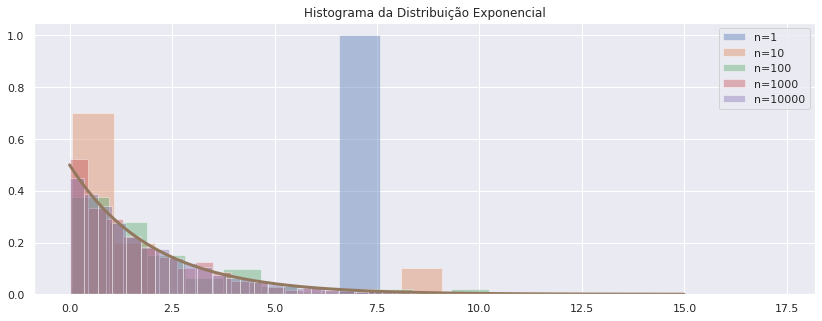

In [5]:
# Exemplo 6.2.4

lamda = 0.5   # Não posso usar lambda
beta = 1/lamda # Numpy usa esse parâmetro
t = np.arange(0.0001, 15, 0.01)
X_true = lamda*np.exp(-lamda*t)

fig, ax = plt.subplots(figsize = (14, 5))

for n in [1, 10, 100, 1000, 10000]: 

    X = np.random.exponential(scale = beta, size = n)

    sns.distplot(X, ax = ax, kde = False, norm_hist = True, label = 'n='+str(n))  # area = 1

sns.lineplot(t, X_true, ax = ax, lw = 3)

ax.set_title('Histograma da Distribuição Exponencial')
ax.legend()
plt.show()

### Teorema Central do Limite

Se as variáveis aleatórias $X_1, ..., X_n$ formam uma amostra aleatória de tamanho $n$ para uma dada distribuição de média $\mu$ e variância $\sigma^2$ finita, então para cada número $x$, 

$$lim_{n\to\infty} P[\frac{\bar{X}_n - \mu}{\sigma/n^{1/2}} \leq x] = \Phi(x),$$

onde $\Phi$ é a função de densidade acumulada da distribuição normal!!!



In [6]:
coffee_df = pd.read_csv('../data/CoffeeAndCode.csv')
display(coffee_df.head())
display(coffee_df.shape)
display(coffee_df.describe())

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29


(100, 9)

,CodingHours,CoffeeCupsPerDay
count,100.000000,100.000000
mean,6.410000,2.890000
std,2.644205,1.613673
min,1.000000,1.000000
25%,4.000000,2.000000
50%,7.000000,2.500000
75%,8.000000,4.000000
max,10.000000,8.000000


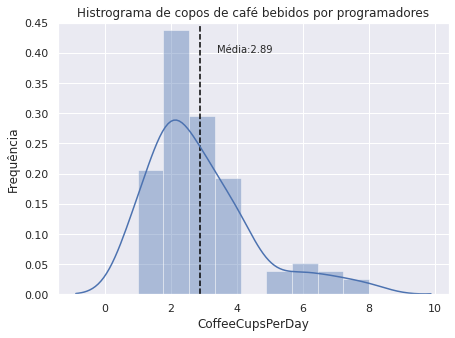

In [7]:
# Plotting 

fig, ax = plt.subplots(figsize = (7, 5))
sns.distplot(coffee_df.CoffeeCupsPerDay, ax = ax)
ax.vlines(coffee_df.CoffeeCupsPerDay.mean(), 
          ymin = 0, ymax = 1, 
          linestyle = '--', color = 'black', 
          label = 'black')
ax.annotate('Média:'+str(coffee_df.CoffeeCupsPerDay.mean()), 
            (coffee_df.CoffeeCupsPerDay.mean() + 0.5, 0.4))
ax.set_title('Histrograma de copos de café bebidos por programadores')
ax.set_ylabel('Frequência')
ax.set_ylim((0,0.45))
plt.show()

In [8]:
# Generating sample means

samples = [10,50,150,300,500,1000]
n_experiments = 500

experiments_coffe_cups = np.empty((n_experiments, len(samples)))

for j, sample_size in enumerate(samples):
    
    sample = coffee_df.CoffeeCupsPerDay.sample(n = sample_size*n_experiments, replace = True)
    matrix = np.array(sample).reshape((n_experiments, sample_size))
    experiments_coffe_cups[:,j] = matrix.mean(axis = 1)

experiments_coffe_cups_df = pd.DataFrame(experiments_coffe_cups, columns = samples)

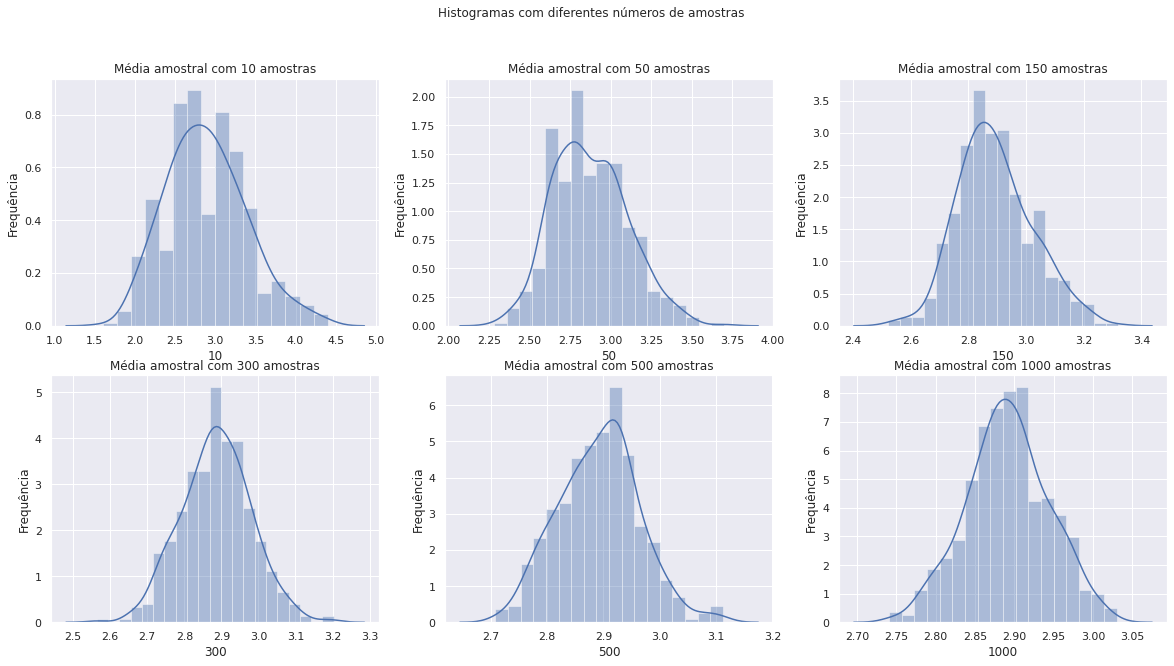

In [9]:
fig, ax = plt.subplots(2,3, figsize = (20,10))
for index, column in enumerate(experiments_coffe_cups_df.columns):
    i = int(index/3)
    j = index % 3
    sns.distplot(experiments_coffe_cups_df[column], ax = ax[i][j])
    ax[i][j].set_title('Média amostral com {} amostras'.format(column))
    ax[i][j].set_ylabel('Frequência')
    
fig.suptitle('Histogramas com diferentes números de amostras')
plt.show()

### Método Delta

Seja $Y_1, Y_2, \dots$ uma sequência de v.a. e $F$ uma função de densidade acumulada contínua. Sejam $\theta \in \mathbb{R}$ e $\{a_n\}_{n\in\mathbb{N}}$ que tende ao $\infty$. Suponha que $a_n(Y_n - \theta)$ converge para $F$. Seja $\alpha$ uma função com derivada contínua, tal que $\alpha '(\theta) \neq 0$. Então $a_n[\alpha(Y_n) - \alpha(\theta)]/\alpha '(\theta)$ converge para a distribuição $F$. 

[Aproximação de Taylor e Método Delta](http://www.stat.rice.edu/~dobelman/notes_papers/math/TaylorAppDeltaMethod.pdf)